# Importing required Libarries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

# Importing Dataset

In [2]:
path = "/content/globalterrorismdb_0718dist.csv"
terror = pd.read_csv(path, encoding='ISO-8859-1', low_memory=False)

# Data Cleaning and Structuring

In [3]:
terror

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [4]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


There are numerous columns, which I haven't counted as of now. However, the columns hold significance, and thus, we should examine them closely to ascertain their contents.

In [5]:
terror.rename(columns={
    'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'country_txt': 'Country', 'provstate': 'State',
    'region_txt': 'Region', 'attacktype1_txt': 'AttackType', 'target1': 'Target', 'nkill': 'Killed',
    'nwound': 'Wounded', 'summary': 'Summary', 'gname': 'Group', 'targtype1_txt': 'Target_type',
    'weaptype1_txt': 'Weapon_type', 'motive': 'Motive'
}, inplace=True)


We will now exclusively choose significant columns from the original dataset to proceed with.

In [6]:
terror_new = terror[['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'city', 'latitude', 'longitude', 'AttackType',
                 'Killed', 'Wounded', 'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive']]


In [7]:
terror_new.head()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
pd.DataFrame(terror_new.isna().sum()).T

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,0,0,0,0,421,0,434,4556,4557,0,10313,16311,636,66129,0,0,0,131130


Here we can clearly see the State has 421 missing values, Target has 636, killed has 10313 and so on.

- Here we can Fill the missing data with the Mean/Median/Mode Value.

- Ignore the missing data and do the analysis without that particular data/Column in such a way that it does not effect the analysis

In [9]:
terror_new.State.fillna("Unknown", inplace = True)

<ipython-input-9-c861560abde3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_new.State.fillna("Unknown", inplace = True)


In [10]:
terror_new["State"].isna().sum()

0

In [11]:
terror_new.Target.fillna("Unknown", inplace = True)

<ipython-input-11-8f0639931715>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_new.Target.fillna("Unknown", inplace = True)


In [12]:
terror_new.Target.isna().sum()

0

In [13]:
terror_new.Killed

0         1.0
1         0.0
2         1.0
3         NaN
4         NaN
         ... 
181686    1.0
181687    2.0
181688    0.0
181689    0.0
181690    0.0
Name: Killed, Length: 181691, dtype: float64

Here there are some NAN values on the killed Column, let's find out the Mean, Median and Mode for the Column

In [14]:
terror_new.Killed.mean()

2.4032722986614385

In [15]:
terror_new.Killed.mode()

0    0.0
Name: Killed, dtype: float64

Here we are filling up the empty/missing(NAN) values in the column with the mode value that is 0.

In [16]:
terror_new.Killed.fillna(terror.Killed.mode()[0],inplace = True)


<ipython-input-16-fc7561221700>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_new.Killed.fillna(terror.Killed.mode()[0],inplace = True)


In [17]:
terror_new.Killed

0         1.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
181686    1.0
181687    2.0
181688    0.0
181689    0.0
181690    0.0
Name: Killed, Length: 181691, dtype: float64

In [18]:
terror_new.Killed.isna().sum()

0

Filling up the Wounded column with the mode value.

In [19]:
terror_new.Wounded.fillna(terror.Wounded.mode()[0], inplace = True)


<ipython-input-19-e2c18e477b29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_new.Wounded.fillna(terror.Wounded.mode()[0], inplace = True)


In [20]:
terror_new['Wounded'].isna().sum()

0

Let's now check for the duplicate data in the our main DataFrame.

In [21]:
terror_new.duplicated().value_counts()

False    172161
True       9530
dtype: int64

The above **True** values refers to duplicate data in the dataset and we should always remove/drop the duplicate values.

In [22]:
df=terror_new.drop_duplicates()

In [23]:
df

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Unknown,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN


In [24]:
df.shape

(172161, 18)

On dropping the Duplicate values we can clearly see the reduction in the number of rows that is from 181691 to 172161

In [25]:
df.isna().sum()

Year                0
Month               0
Day                 0
Country             0
State               0
Region              0
city              434
latitude         4008
longitude        4009
AttackType          0
Killed              0
Wounded             0
Target              0
Summary         59061
Group               0
Target_type         0
Weapon_type         0
Motive         122252
dtype: int64

Let now remove the data which have Date and Month as "0".

In [26]:
df[df["Month"]==0]


,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
1123,1972,0,0,Philippines,Capiz,Southeast Asia,Roxas,11.586558,122.753716,Bombing/Explosion,0.0,0.0,air manila fokker F-27p,NaN,Unknown,Airports & Aircraft,Explosives,NaN
1690,1973,0,0,Colombia,Unknown,South America,unknown,NaN,NaN,Hostage Taking (Kidnapping),0.0,0.0,"Alirio Serrano Sanchez, rancher",NaN,National Liberation Army of Colombia (ELN),Business,Unknown,NaN
2164,1974,0,0,France,Paris,Western Europe,Paris,48.856644,2.342330,Bombing/Explosion,0.0,0.0,Bank Lazard,NaN,Unknown,Business,Explosives,NaN
2165,1974,0,0,Italy,Lazio,Western Europe,Rome,41.890961,12.490069,Bombing/Explosion,0.0,0.0,TWA Boeing 707,NaN,Unknown,Airports & Aircraft,Explosives,NaN
2744,1975,0,0,Pakistan,Punjab,South Asia,Rawalpindi,33.594013,73.069077,Bombing/Explosion,0.0,0.0,Pakistan Airlines Boeing 707,NaN,Unknown,Airports & Aircraft,Explosives,NaN
3484,1976,0,0,Turkey,Istanbul,Middle East & North Africa,Istanbul,41.106178,28.689863,Unknown,0.0,0.0,Turkish Army Vehicle,NaN,Armenian Secret Army for the Liberation of Arm...,Military,Unknown,NaN
3485,1976,0,0,Turkey,Ankara,Middle East & North Africa,Ankara,39.930771,32.767540,Unknown,0.0,0.0,military base,NaN,Armenian Secret Army for the Liberation of Arm...,Military,Unknown,NaN
4407,1977,0,0,Japan,Tokyo,East Asia,Tokyo,35.689125,139.747742,Bombing/Explosion,0.0,0.0,Tokyo University,NaN,Tribal Battlefront,Educational Institution,Explosives,NaN
4408,1977,0,0,Japan,Tokyo,East Asia,Tokyo,35.689125,139.747742,Bombing/Explosion,0.0,0.0,Private Residence of President of a leading al...,NaN,Tribal Battlefront,Business,Explosives,NaN


In [27]:
df[df["Day"]==0]

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
96,1970,3,0,Philippines,Metropolitian Manila,Southeast Asia,Manila,14.596051,120.978666,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104603,2011,12,0,West Bank and Gaza Strip,West Bank,Middle East & North Africa,Nablus,32.222271,35.253506,Unarmed Assault,0.0,0.0,Christian Choir Group,"12/0/2011: On or around 12/22/2011, in Nablus ...",Jewish Extremists,Private Citizens & Property,Other,While the motive for this exact attack is unkn...
104611,2011,12,0,Pakistan,Khyber Pakhtunkhwa,South Asia,Mandeo,32.921246,70.558174,Bombing/Explosion,0.0,0.0,Private home,12/0/2011: Sometime during the night between ...,Unknown,Private Citizens & Property,Explosives,"While the motive for this attack was unknown, ..."
104612,2011,12,0,Pakistan,Khyber Pakhtunkhwa,South Asia,Mandeo,32.921246,70.558174,Bombing/Explosion,0.0,0.0,Local School,12/0/2011: Sometime during the night between D...,Unknown,Educational Institution,Explosives,"While the motive for this attack was unknown, ..."
104613,2011,12,0,Pakistan,Khyber Pakhtunkhwa,South Asia,Mandeo,32.921246,70.558174,Bombing/Explosion,0.0,0.0,Local water tank,12/0/2011: Sometime during the night between ...,Unknown,Food or Water Supply,Explosives,"While the motive for this attack was unknown, ..."


In [28]:
df[df.Month==0].shape

(20, 18)

Here we can see that there are total 20 rows of data that has the value "0" for the month, let's check for the Day column as well and then drop data for both the coulmns.

In [29]:
df[df.Day==0].shape

(813, 18)

For the Day column we have 813 entries marked as Day "0". Let's drop all these columns



In [30]:
clean_df = df.drop(df[df["Month"]==0].index, axis=0)

Let's check if the data where Month is zero is dropped or not.



In [31]:
clean_df[clean_df["Month"]==0].shape

(0, 18)

Let's remove the incorrect data for the Day Column as well.



In [32]:
clean_df.drop(clean_df[clean_df.Day==0].index,axis=0,inplace=True)


In [33]:
clean_df.shape

(171348, 18)

Here is the final Cleaned Dataset with the total 171348 rows, ready for the Exploratory Analysis.

# Exploratory Data Analysis and Visualization





In [34]:
clean_df.shape

(171348, 18)

In [35]:
clean_df.head()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Unknown,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,NaN,Tupamaros (Uruguay),Police,Firearms,NaN
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft


## Let's first take a look at the Year Wise Distribution of Terror Activities


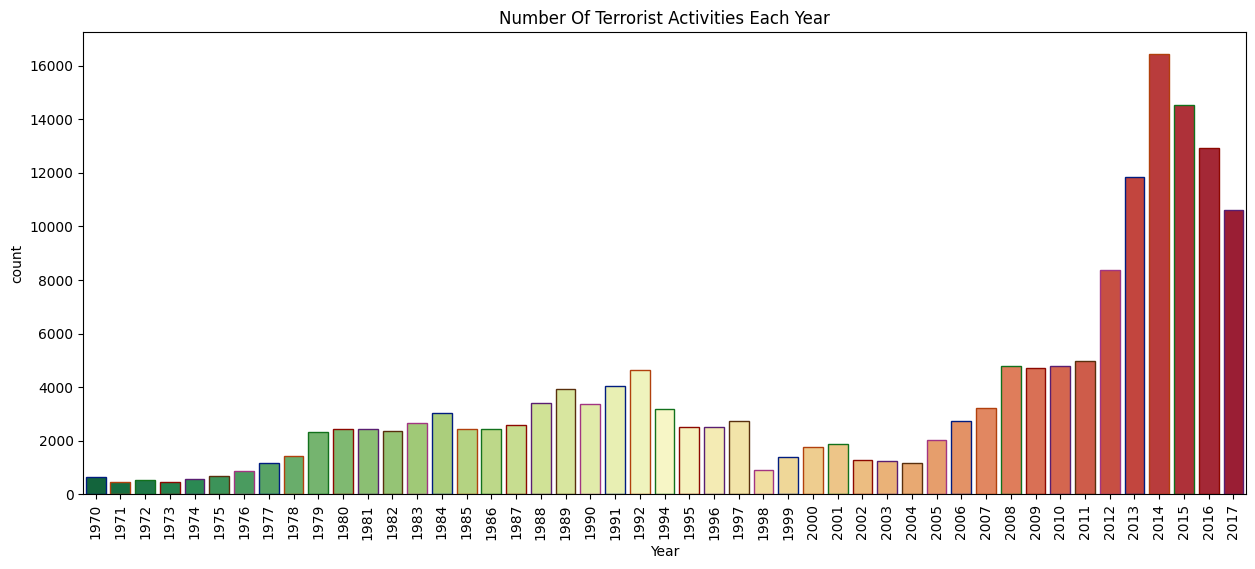

In [36]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='Year', data=clean_df, palette='RdYlGn_r', edgecolor=sns.color_palette('dark', 7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

Insights:
- The graph illustrates that the year 1980 experienced the highest number of incidents throughout the entire time frame.
- Following closely, the years **1979, 1978, and 1977** also exhibited significant levels of activity.

## Let's check the Top terrorist groups responsible for the most number of attacks around the world within the time frame of 11 years

In [37]:
Terrorrist_group=clean_df.Group.value_counts()[:20].drop("Unknown")
Terrorrist_group

Taliban                                             7291
Islamic State of Iraq and the Levant (ISIL)         5187
Shining Path (SL)                                   3734
Al-Shabaab                                          3259
New People's Army (NPA)                             2681
Farabundo Marti National Liberation Front (FMLN)    2505
Irish Republican Army (IRA)                         2447
Boko Haram                                          2381
Revolutionary Armed Forces of Colombia (FARC)       2355
Kurdistan Workers' Party (PKK)                      2229
Basque Fatherland and Freedom (ETA)                 1891
Communist Party of India - Maoist (CPI-Maoist)      1844
Maoists                                             1603
Liberation Tigers of Tamil Eelam (LTTE)             1567
National Liberation Army of Colombia (ELN)          1388
Tehrik-i-Taliban Pakistan (TTP)                     1335
Palestinians                                        1106
Houthi extremists (Ansar Allah)

In [38]:
type(Terrorrist_group)

pandas.core.series.Series

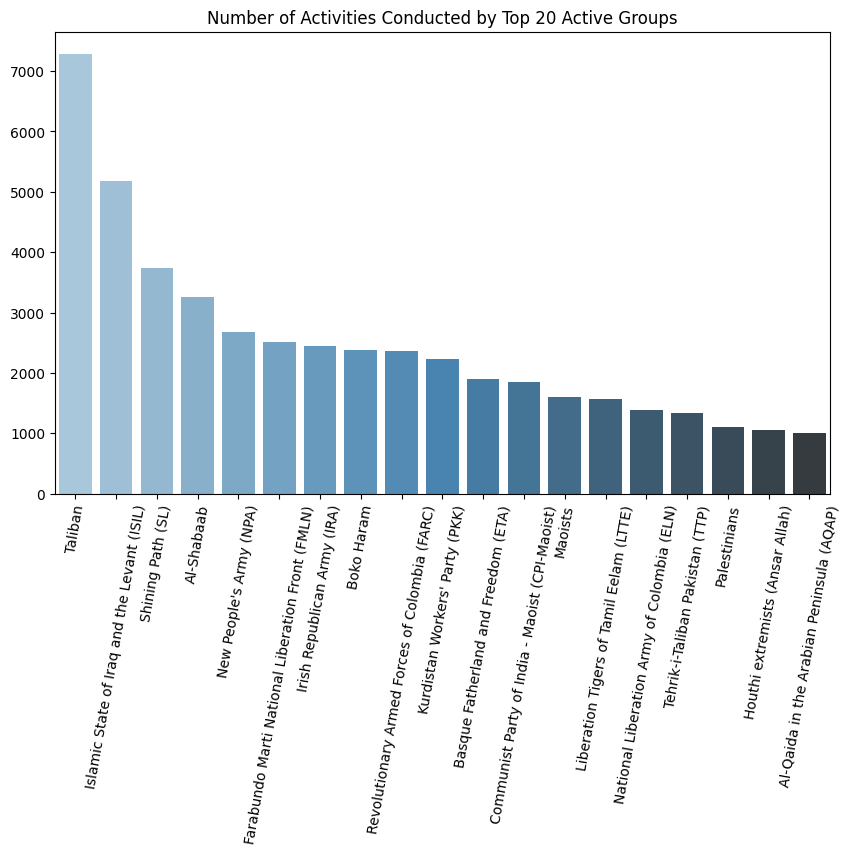

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x=Terrorrist_group.index, y=Terrorrist_group.values, palette='Blues_d')
plt.title("Number of Activities Conducted by Top 20 Active Groups")
plt.xticks(rotation=80)
plt.style.use("dark_background")
plt.show()


Insights:

- Upon analyzing the graphs, a clear pattern emerges: the Taliban group stands out as the most prolific instigator of attacks. The visualization underscores the staggering impact of this group, with over 7000 incidents worldwide directly attributed to the Taliban.

- Furthermore, the graph presents a comprehensive view of the top 20 most active terrorist groups. These groups collectively account for the multitude of attacks documented in our dataset spanning 47 years.

## Let's Visulalize the activites conducted in different Regions


In [40]:
clean_df.Region.unique()

array(['Central America & Caribbean', 'North America', 'South America',
       'Western Europe', 'Eastern Europe', 'Sub-Saharan Africa',
       'Southeast Asia', 'Middle East & North Africa', 'East Asia',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [41]:
clean_df.Region.nunique()

12

In [42]:
Regions=clean_df.Region.value_counts()
Regions

Middle East & North Africa     48569
South Asia                     43452
Sub-Saharan Africa             17000
South America                  16444
Western Europe                 15012
Southeast Asia                 12040
Central America & Caribbean     8970
Eastern Europe                  5005
North America                   3331
East Asia                        702
Central Asia                     553
Australasia & Oceania            270
Name: Region, dtype: int64

Here it is visible that there are total 12 Regions within our dataset, let's now try to visualize and get some insights out of it.



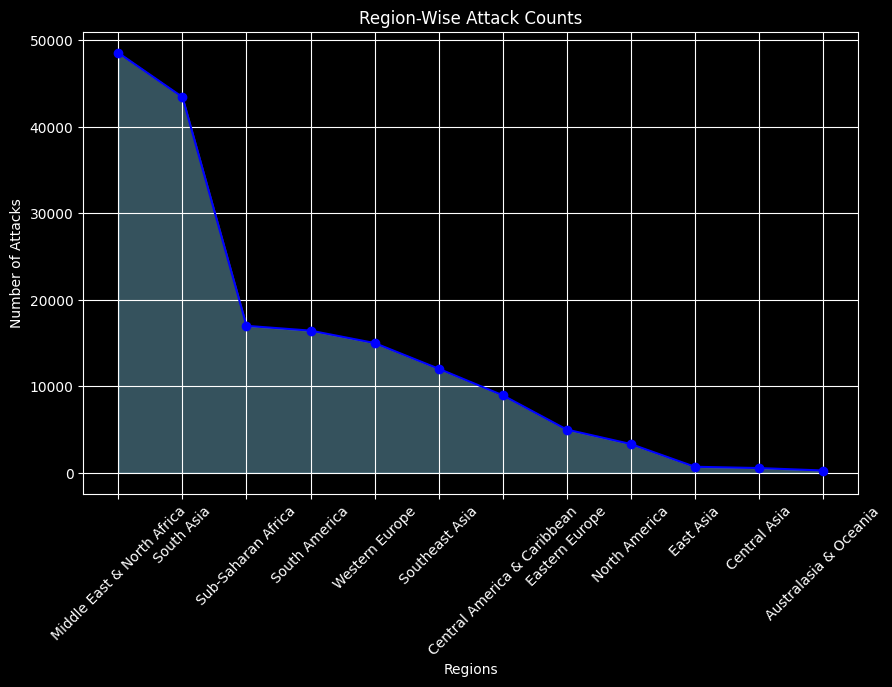

In [43]:
plt.figure(figsize=(10, 6))
plt.fill_between(Regions.index, Regions.values, color='skyblue', alpha=0.4)
plt.plot(Regions.index, Regions.values, marker='o', color='blue')
plt.title("Region-Wise Attack Counts")
plt.xlabel("Regions")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Insights:

- The graphical representation unmistakably highlights the Middle East and North Africa as the focal point of terrorism, with the highest incident rates observed in this region. Conversely, Western regions, including Europe, Central America, and Eastern Europe, exhibit comparatively lower levels of activity.

- In Eastern Asia, Central Asia, and Australasia, terrorism incidents remain sparse. Notably, the Australasia and Oceania region records a mere 270 attacks, in stark contrast to the Middle East and North Africa's staggering tally of nearly 49,000 attacks.

## Let's Now Analyse the Most Affected Countries

In [44]:
clean_df.Country.value_counts()

Iraq                   23439
Pakistan               13758
Afghanistan            12498
India                  11556
Colombia                7428
                       ...  
St. Lucia                  1
Antigua and Barbuda        1
Andorra                    1
North Korea                1
Wallis and Futuna          1
Name: Country, Length: 205, dtype: int64

<ipython-input-45-f19fe6bded56>:1: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  Countries=clean_df.Country.dropna(False)


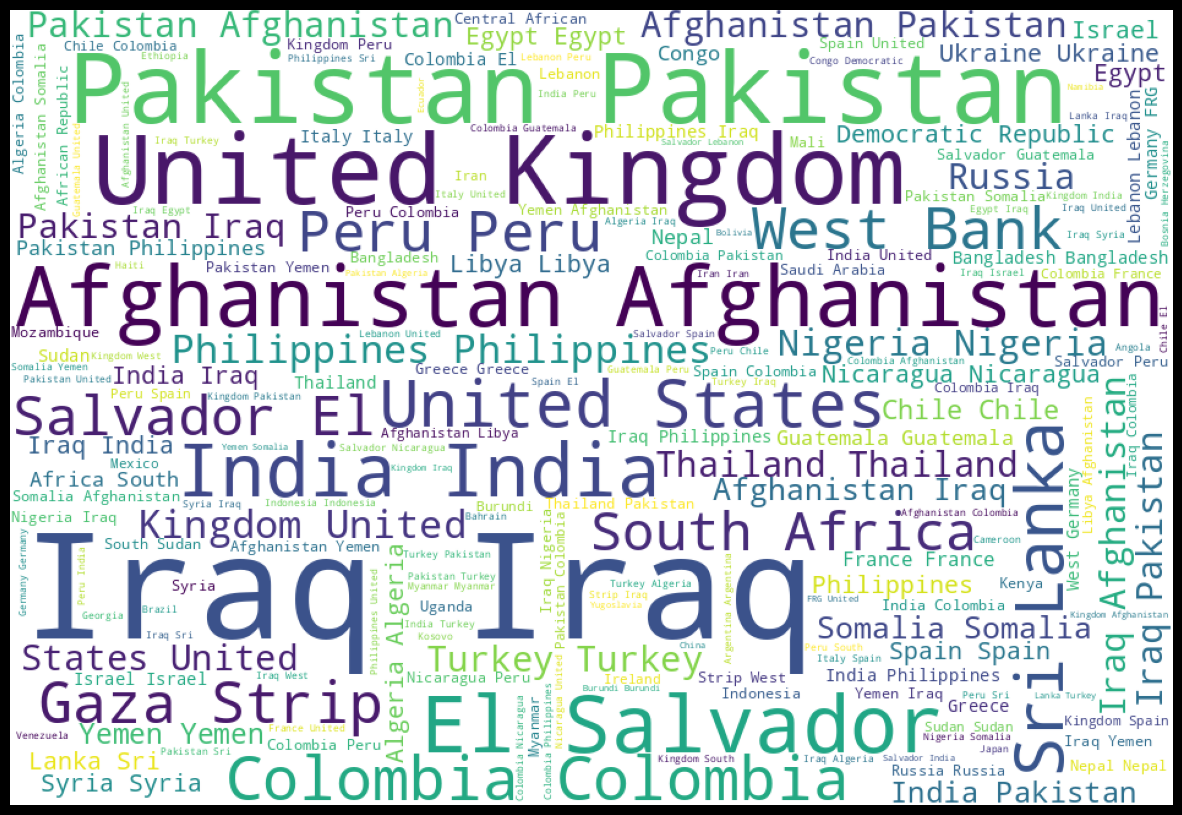

In [45]:
Countries=clean_df.Country.dropna(False)
plt.subplots(figsize=(15,20))
wordcloud= WordCloud(background_color='white', width=950, height = 650).generate(' '.join(Countries))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Insights-

- It is clearly visible that IRAQ is the most affected nation across the Globe followed by AFGHANISTAN & PAKISTAN.
- Very few Activities has been reported from North Korea & Wallis and Futuna.
- Nigeria,Algeria,Somalia, are some of the most affected country from the South Africa region.

## Let's check the Top 20 Countries affected by Terrorism


In [46]:
Attacked_country= clean_df.Country.value_counts()[:20]

In [47]:
Attacked_country.index

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'United Kingdom', 'El Salvador', 'Somalia', 'Turkey', 'Nigeria',
       'Thailand', 'Yemen', 'Spain', 'Sri Lanka', 'United States', 'Algeria',
       'Lebanon', 'Egypt'],
      dtype='object')

<ipython-input-48-fa1bce019586>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_countries)


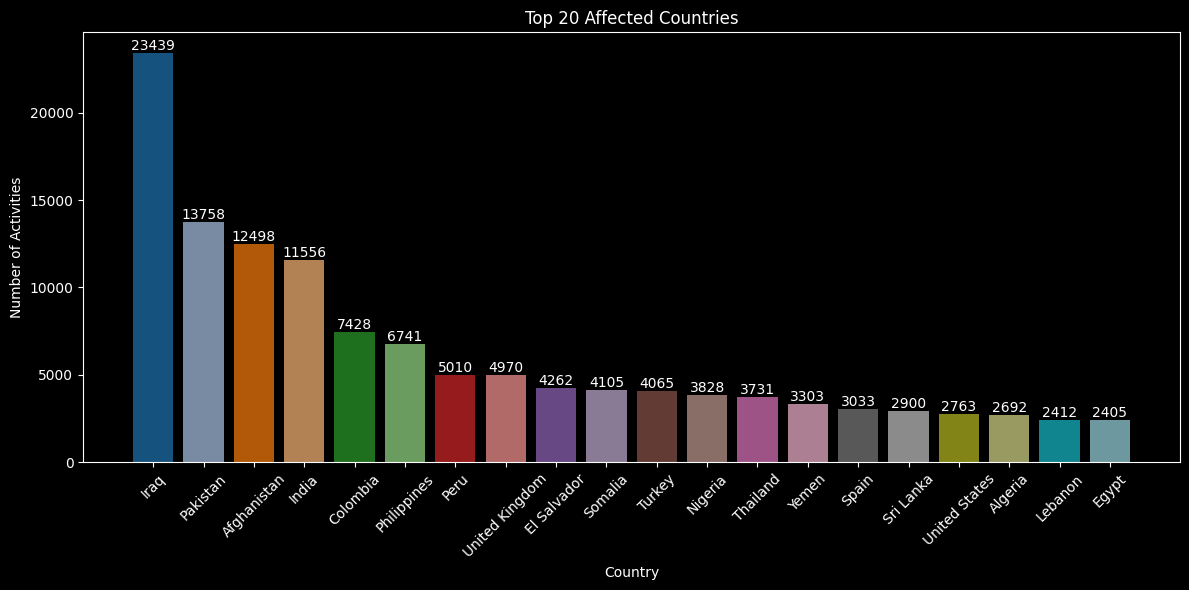

In [48]:
num_countries = len(Attacked_country)
colors = plt.cm.get_cmap('tab20', num_countries)

plt.figure(figsize=(12, 6))
bars = plt.bar(Attacked_country.index, Attacked_country.values, color=colors(np.arange(num_countries)), alpha=0.7)
plt.xlabel('Country')
plt.ylabel('Number of Activities')
plt.title('Top 20 Affected Countries')
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.show()


Insight:
- The graphical representation highlights Pakistan, Afghanistan, and India as the top three countries most susceptible to these activities, emphasizing their vulnerability.

- Additionally, the graph vividly illustrates the significant disparity between occurrences of terrorist activities in European countries and those in South East Asian countries. European nations demonstrate notably lower incident rates in comparison to their counterparts in South East Asia.

## Let's visualize the percentage of each type of attack that occurred across the World geography

In [49]:
clean_df['AttackType'].unique()


array(['Assassination', 'Armed Assault', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Hijacking', 'Unknown',
       'Hostage Taking (Kidnapping)', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [50]:
type_attack=clean_df.AttackType.value_counts()

In [51]:
type(type_attack)

pandas.core.series.Series

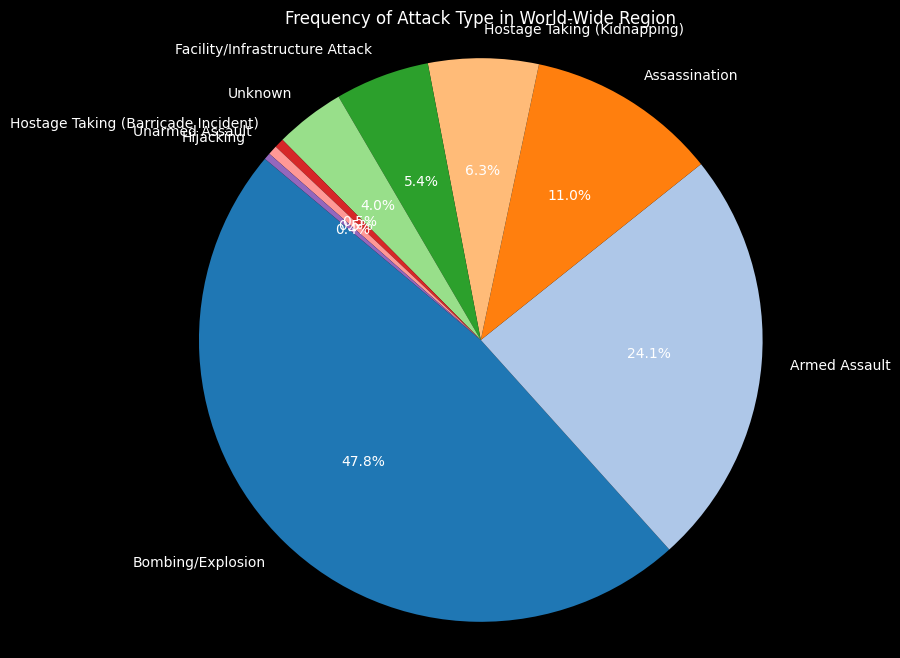

In [52]:
plt.figure(figsize=(8, 8))
plt.pie(type_attack, labels=type_attack.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Frequency of Attack Type in World-Wide Region")
plt.axis('equal')
plt.show()


Insight:
- The pie chart prominently illustrates that the "Bombing" attack type constitutes approximately 48% of the total activities recorded. This figure signifies nearly half of all global incidents.

- The graph provides a compelling indication that terrorist groups displayed a strong propensity for conducting intentional bombing and explosive activities.

- Activities categorized as "Armed Assault" contribute to about 24% of the overall total, while "Assassination" activities account for 11% of the entire spectrum of events.







## Let's explore the Visual Representation of Weapon Types.

<Axes: xlabel='Weapon_type', ylabel='count'>

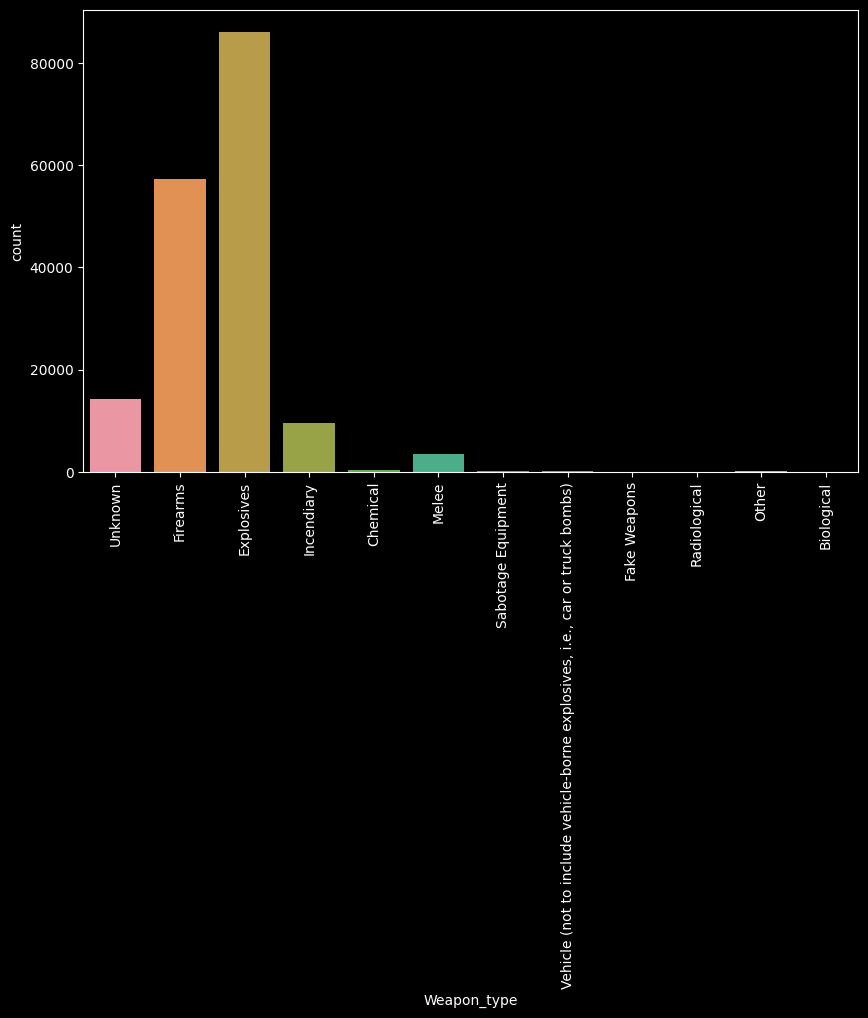

In [53]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='Weapon_type',data=clean_df)

Insight:
- Explosives stand out as the prevailing weapon, echoing the prevalence of the "Bombing" attack type in the recorded incidents.

- Next in line are firearms, suggesting a significant link between the "Armed Assault" attack type and the use of firearms as a preferred means of engagement.

- Beyond explosives and armed assaults, other weapon types, including firearms and unidentified categories, secure a distinct position within the hierarchy of attack methods.

# Summary and Conclusion:
Throughout this project, we unearthed significant insights into global terrorism activities. By meticulously examining the Kaggle dataset, we artfully depicted trends among the countries most impacted, the prevalent regions, and the exceedingly active terrorist groups.

Our discerning insights lead us to the conclusive observation that global terrorism profoundly impacts specific regions, predominantly driven by influential terrorist organizations.

# Future Prospects:
Expanding on our findings, future endeavors could focus on in-depth analyses of specific countries or regions, unraveling nuanced terrorism activity trends. This could culminate in comprehensive reports that illuminate disparities and distinctions among these selected geographical entities.